```
ME72: Maestría en Métodos Cuantitativos para la Gestión y Análisis de Datos
M72109: Analisis de datos no estructurados
Universidad de Buenos Aires - Facultad de Ciencias Economicas (UBA-FCE)
Año: 2020
Profesor: Facundo Santiago
```

# Servicios cognitivos de Computer Vision

## ¿Que son los servicios cognitivos?

Crear modelos de Computer Vision que tengan gran precisión y funcionen en una variedad de contextos importante no es una tarea sencilla. Requiren grandes cantidades de datos y experencia en la creación de modelos básados en Deep Learning. A medida que el procesamiento de imagenes se vuelve mas robusto, muchas organizaciones de tecnología han optado por empaquetar estos modelos de alta performance y ofrecerlos como servicios que las organizaciones pueden consumir directamente como un servicio web. 

Azure Cognitive Services es uno de estos servicios, el cual cuenta con una API y librerias que se pueden utilizar en multiples lenguajes para ayudarnos a construir aplicaciones inteligentes sin necesidad de tener habilidades de ciencia de datos ni grandes volumenes de información.

En nuestro caso, exploraremos los servicios conitivos de Computer Vision entre los cuales se encuentran:

<table class="table">
<thead>
<tr>
<th style="text-align: left;">Nombre del servicio</th>
<th style="text-align: left;">Descripción</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align: left;"><a href="/en-us/azure/cognitive-services/computer-vision/" title="Computer Vision" data-linktype="absolute-path">Computer Vision</a></td>
<td style="text-align: left;">El servicio de Computer Vision permite analizar imagenes y extraer atributos relevantes de la misma, como descripciones de la escena, propiedades de la imagen, elementos que se continenen en la misma, etc.</td>
</tr>
<tr>
<td style="text-align: left;"><a href="/en-us/azure/cognitive-services/Custom-Vision-Service/home" title="Custom Vision Service" data-linktype="absolute-path">Custom Vision Service</a></td>
<td style="text-align: left;">El servicio de Custom Vision permite construir clasificadores de imagenes utilizando técnicas de Transfer Learning.</td>
</tr>
<tr>
<td style="text-align: left;"><a href="/en-us/azure/cognitive-services/face/" title="Face" data-linktype="absolute-path">Face</a></td>
<td style="text-align: left;">El servicio de Face Recognition provee acceso a algoritmos avanzados de detección de rostros, permitiendo su detección e incluso extracción de atributos interesantes.</td>
</tr>
<tr>
<td style="text-align: left;"><a href="/en-us/azure/cognitive-services/form-recognizer/" title="Form Recognizer" data-linktype="absolute-path">Form Recognizer</a> (Preview)</td>
<td style="text-align: left;">Form Recognizer permite la extracción de valores e información contenida en formularios que tienen información semi-estructurada. Esta información es extraida del documento junto con la estructura que la representa.</td>
</tr>
<tr>
<td style="text-align: left;"><a href="/en-us/azure/cognitive-services/ink-recognizer/" title="Ink Recognizer" data-linktype="absolute-path">Ink Recognizer</a> (Retiring)</td>
<td style="text-align: left;">Ink Recognizer permite el reconocimiento de textos escritos en manuscrita, formas y contenido en general escrito a mano.</td>
</tr>
<tr>
<td style="text-align: left;"><a href="/en-us/azure/cognitive-services/video-indexer/video-indexer-overview" title="Video Indexer" data-linktype="absolute-path">Video Indexer</a></td>
<td style="text-align: left;">Video Indexer permite la extracción de información desde videos.</td>
</tr>
</tbody>
</table>

## Creación de una cuenta de servicios cognitivos en Azure

### Creación de una cuenta en Azure

Hay varias alternativas para utilizar los servicios cognitivos de Azure, pero en nuestro caso crearemos una cuenta de pruebas que tendrá una duracción de 7 días para probar los servicios cognitivos. Esta metodología no requiere de una tarjeta de crédito. Si necesitaran disponer de una cuenta por mayor cantidad de tiempo, es posible crear una cuenta gratuita de Azure que dispone de acceso a los servicios en un Tier Free por 12 meses, sin embargo, este procedimiento requiere la validación del usuario por medio de una tarjeta de crédito.

Para crear una cuenta, utilicen el siguiente link: https://azure.microsoft.com/es-es/try/cognitive-services/

Luego, seleccionaremos la opción para obtener una clave del servicio de Computer Vision:

<img src="https://github.com/santiagxf/M72109/blob/master/Vision/Docs/get-api.png?raw=1" width="800" align="center" />


Luego debemos indicar que tipo de cuenta utilizaremos. en nuestro caso, especificaremos una cuente de tipo Trial que durará por 7 dias desde el momento de creación:


<img src="https://github.com/santiagxf/M72109/blob/master/Vision/Docs/free-trial.png?raw=1" width="800" />

Luego deberemos aceptar los terminos y condiciones para utilizar el servicio y finalmente iniciar sesión utilizando alguna de las opciones que están disponibles. Si no disponen de una cuenta Microsoft, pueden crearse una desde https://signup.microsoft.com y eligiendo la opción Crear una Cuenta Microsoft.

### Obtener las claves de acceso a los servicios

Una vez que activamos nuestra cuenta trial, obtendremos 2 puntos de información importante:
 - Puntos de conexión: Es la URL que deberemos de indicar para acceder al servicio
 - Claves: Estas claves son el mecanismo de autenticación que utilizaremos.
 
Necesitaremos ambas piezas de información para continuar. Si no pueden encontrar sus claves, pueden acceder a https://azure.microsoft.com/es-es/try/cognitive-services/my-apis y debería llevarlos a una pagina similar a la siguiente donde están especificados ambos valores:

<img src="https://github.com/santiagxf/M72109/blob/master/Vision/Docs/get-keys.png?raw=1" width="1000" align="center" />

## Creación de un cliente para la utilización de la API de visión

### Instalación del SDK

Instalamos las librerias del SDK junto con algunas otras que necesitaremos

In [ ]:
!pip install azure-cognitiveservices-vision-computervision
!pip install matplotlib
!pip install skimage

Descargamos algunas librerias para simplificar el procesamiento

In [ ]:
!wget -N https://raw.githubusercontent.com/santiagxf/M72109/master/Vision/Utils/Cognitive.py --directory-prefix ./Utils/
!wget -N https://raw.githubusercontent.com/santiagxf/M72109/master/Vision/Utils/Plotting.py --directory-prefix ./Utils/

Importamos las clases con las que vamos a trabajar

In [3]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

Especificación de las credenciales para operar el servicio. Aquí deberemos utilizar las credenciales que generaron desde la página del portal de Microsoft Azure

In [15]:
subscription_key = ""
endpoint = "https://westcentralus.api.cognitive.microsoft.com"

*Noten que endpoint es la URL que obtienen desde el portal, pero sin la parte "/vision"

In [5]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

### Describir una imagen

Computer Vision puede analizar una imagen y generar una frase inteligible que describa su contenido. El algoritmo realmente devuelve varias descripciones según diferentes características visuales y cada descripción tiene una puntuación de confianza. El resultado final es una lista de descripciones ordenadas de mayor a menor confianza.

In [ ]:
image_url = "https://raw.githubusercontent.com/santiagxf/M72109/master/Vision/Images/Perro-caminando.jpg"

In [ ]:
description_results = computervision_client.describe_image(image_url, language='es')

In [ ]:
print("Descripción de la imagen: ")
if (len(description_results.captions) == 0):
    print("No se detectó una descripción.")
else:
    for caption in description_results.captions:
        print("'{}' con nivel de confidencia de {:.2f}%".format(caption.text, caption.confidence * 100))

Descripción de la imagen: 
'una persona y un niño caminando con un perro en la calle' con nivel de confidencia de 54.39%


### Categorizar una imagen

Computer Vision devuelve las categorías basadas en la taxonomía que se detectan en una imagen. A diferencia de las etiquetas, las categorías se organizan en una jerarquía hereditaria de elementos primarios y secundarios, y son menos numerosas (86 en lugar de miles de etiquetas). La categorización puede realizarse en solitario o junto con un nuevo modelo de etiquetas.

<img src='https://docs.microsoft.com/es-es/azure/cognitive-services/computer-vision/images/analyze_categories-v2.png' />

In [ ]:
image_url = "https://raw.githubusercontent.com/santiagxf/M72109/master/Vision/Images/Perro-caminando.jpg"

In [ ]:
categorize_results = computervision_client.analyze_image(image_url, visual_features=[VisualFeatureTypes.categories], language='es')

print("Categorias en la imagen: ")
if (len(categorize_results.categories) == 0):
    print("No se detectaron categorias.")
else:
    for category in categorize_results.categories:
        print("'{}' con nivel de confidencia de {:.2f}%".format(category.name, category.score * 100))

Categorias en la imagen: 
'abstracto_' con nivel de confidencia de 0.39%
'outras_' con nivel de confidencia de 5.47%


Otras imagenes para investigar:
 - https://docs.microsoft.com/es-es/azure/cognitive-services/computer-vision/images/bread.png

### Etiquetas de una imagen

Computer Vision devuelve etiquetas en función de miles de objetos, seres vivos, paisajes y acciones reconocibles. Cuando las etiquetas son ambiguas o no muy comunes, la respuesta de la API contiene «indicaciones» para aclarar el significado de la etiqueta en el contexto de un entorno conocido. Las etiquetas no están organizadas por su taxonomía y no existen jerarquías de herencia. Una colección de etiquetas de contenido es la base de la "descripción" de una imagen que se muestra en lenguaje natural con formato de oraciones completas. Tenga en cuenta que, en este momento, el inglés es el único idioma admitido para la descripción de la imagen.

In [ ]:
tags_result = computervision_client.tag_image(image_url, language='es')

print("Tags en la imagen: ")
if (len(tags_result.tags) == 0):
    print("No se detectaron tags.")
else:
    for tag in tags_result.tags:
        print("'{}' con nivel de confidencia de {:.2f}%".format(tag.name, tag.confidence * 100))

Tags en la imagen: 
'árbol' con nivel de confidencia de 99.98%
'exterior' con nivel de confidencia de 99.88%
'persona' con nivel de confidencia de 98.55%
'suelo' con nivel de confidencia de 97.92%
'perro' con nivel de confidencia de 97.45%
'tejido' con nivel de confidencia de 93.73%
'vaqueros' con nivel de confidencia de 89.38%
'carnívoro' con nivel de confidencia de 84.08%
'sonrisa' con nivel de confidencia de 82.77%
'acera' con nivel de confidencia de 77.37%
'animal' con nivel de confidencia de 76.51%
'pantalones' con nivel de confidencia de 75.33%
'mujer' con nivel de confidencia de 65.40%
'planta' con nivel de confidencia de 59.77%
'pantalones cortos' con nivel de confidencia de 54.23%
'calzado' con nivel de confidencia de 52.22%


### Detección de rostros

Computer Vision puede detectar caras humanas en una imagen y generar la edad, el sexo y el rectángulo de cada rostro detectado.

In [ ]:
detect_faces_results = computervision_client.analyze_image(image_url, visual_features=[VisualFeatureTypes.faces])

print("Caras detectadas en la imágen: ")
if (len(detect_faces_results.faces) == 0):
    print("No se detectaron caras en la imágen.")
else:
    for face in detect_faces_results.faces:
        print("'{}' de {} años de edad en la ubicación {}, {}, {}, {}".format(face.gender, face.age, \
        face.face_rectangle.left, face.face_rectangle.top, \
        face.face_rectangle.left + face.face_rectangle.width, \
        face.face_rectangle.top + face.face_rectangle.height))

Caras detectadas en la imágen: 
'Female' de 27 años de edad en la ubicación 139, 306, 201, 368
'Female' de 28 años de edad en la ubicación 339, 334, 395, 390


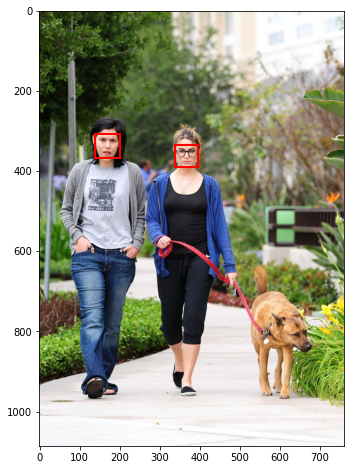

In [ ]:
from Utils.Plotting import plot_image_with_faces

plot_image_with_faces(image_url, [ face.face_rectangle for face in detect_faces_results.faces ])

### Detección de contenido para moderación

Computer Vision puede detectar material para adultos en imágenes para restringir la presentación de dichas imágenes. Las marcas de contenido se aplican con una puntuación entre cero y uno para que los desarrolladores puedan interpretar los resultados según sus preferencias. Dentro de la clasificación "adulto" hay varias categorías diferentes:
 - Las imágenes para adultos se definen como aquellas de naturaleza explícitamente sexual que suelen representar desnudos y actos sexuales.
 - Las imágenes subidas de tono se definen como las imágenes de naturaleza sexualmente sugerente y que a menudo contienen material sexual menos explícito que las imágenes etiquetadas como para adultos.
 - Las imágenes gore son las que representan escenas sangrietas o salvajes

In [ ]:
image_url = "https://raw.githubusercontent.com/santiagxf/M72109/master/Vision/Images/hqdefault.jpg"

In [ ]:
detect_adult_results = computervision_client.analyze_image(image_url, visual_features=[VisualFeatureTypes.adult], language='es')

print("Analisis de la imagen con respecto a contenido adulto o racismo:")
print("Contenido adulto: {} con nivel de confidencia {:.2f}%".format(detect_adult_results.adult.is_adult_content, 
                                                                    detect_adult_results.adult.adult_score * 100))
print("Contenido sangriento/salvaje: {} con nivel de confidencia {:.2f}%".format(detect_adult_results.adult.is_gory_content, 
                                                                    detect_adult_results.adult.gore_score * 100))
print("Contenido racista: {} con nivel de confidencia {:.2f}%".format(detect_adult_results.adult.is_racy_content, 
                                                                    detect_adult_results.adult.racy_score * 100))

Analisis de la imagen con respecto a contenido adulto o racismo:
Contenido adulto: False con nivel de confidencia 2.98%
Contenido sangriento/salvaje: True con nivel de confidencia 99.78%
Contenido racista: False con nivel de confidencia 5.55%


### Detección de contenido de acuerdo a la ubicación

Computer Vision permite el reconocimiento de puntos de referencia, compatible con imágenes clasificadas en las categorías outdoor_ o building_.

In [ ]:
image_url = "https://raw.githubusercontent.com/santiagxf/M72109/master/Vision/Images/unbenannt13.jpg"

In [ ]:
detect_domain_results_landmarks = computervision_client.analyze_image_by_domain("landmarks", image_url, language='es')

print("Ubicaciones en la imagen:")
if len(detect_domain_results_landmarks.result["landmarks"]) == 0:
    print("No se detectaron ubicaciones específicas.")
else:
    for landmark in detect_domain_results_landmarks.result["landmarks"]:
        print("'{}' con nivel de confidencia de {:.2f}%".format(landmark['name'], landmark['confidence'] * 100))

Ubicaciones en la imagen:
'Phi Phi' con nivel de confidencia de 96.16%


### Detección de celebridades

In [13]:
image_url = "https://static3.srcdn.com/wordpress/wp-content/uploads/2017/09/The-Dark-Knight-Star-Wars-The-Empire-Strikes-Back-and-The-Godfather.jpg"

In [14]:
celebs = computervision_client.analyze_image_by_domain("celebrities", image_url, language='es')

print("Celebridades detectadas:")
if len(celebs.result["celebrities"]) == 0:
    print("No se encontraron.")
else:
    for celeb in celebs.result["celebrities"]:
        print(celeb["name"])

Celebridades detectadas:
Marlon Brando


### Detección del tipo de imagen

Computer Vision puede analizar el tipo de contenido de las imágenes, que indica si se trata de una imagen prediseñada o un dibujo lineal. Computer Vision analiza una imagen y evalúa la probabilidad de que sea una imagen prediseñada en una escala de 0 a 3, tal y como se describe en la tabla siguiente.

<table class="table">
<thead>
<tr>
<th><span data-ttu-id="01a2f-107">Value</span><span class="sxs-lookup"></span></th>
<th><span data-ttu-id="01a2f-108">Significado</span><span class="sxs-lookup"></span></th>
</tr>
</thead>
<tbody>
<tr>
<td><span data-ttu-id="01a2f-109">0</span><span class="sxs-lookup"></span></td>
<td><span data-ttu-id="01a2f-110">No es imagen prediseñada</span><span class="sxs-lookup"></span></td>
</tr>
<tr>
<td><span data-ttu-id="01a2f-111">1</span><span class="sxs-lookup"></span></td>
<td><span data-ttu-id="01a2f-112">Ambigua</span><span class="sxs-lookup"></span></td>
</tr>
<tr>
<td><span data-ttu-id="01a2f-113">2</span><span class="sxs-lookup"></span></td>
<td><span data-ttu-id="01a2f-114">Imagen prediseñada normal</span><span class="sxs-lookup"></span></td>
</tr>
<tr>
<td><span data-ttu-id="01a2f-115">3</span><span class="sxs-lookup"></span></td>
<td><span data-ttu-id="01a2f-116">Imagen prediseñada buena</span><span class="sxs-lookup"></span></td>
</tr>
</tbody>
</table>

In [ ]:
image_url = "https://raw.githubusercontent.com/santiagxf/M72109/master/Vision/Images/type-image.jpg"
detect_type_results_remote = computervision_client.analyze_image(image_url, visual_features=[VisualFeatureTypes.image_type], language='es')

print("Tipo de imagen:")
if detect_type_results_remote.image_type.clip_art_type == 0:
    print("La imagen es real.")
elif detect_type_results_remote.image_type.line_drawing_type == 1:
    print("La imágen es ambigua.")
elif detect_type_results_remote.image_type.line_drawing_type == 2:
    print("La imágen no es real.")
else:
    print("La imágen no es real.")

if detect_type_results_remote.image_type.line_drawing_type == 0:
    print("La imágen no está dibujada a trazos")
else:
    print("La imágen está dibujada a trazos")

Tipo de imagen:
La imágen no es real.
La imágen no está dibujada a trazos


### Detección de objetos

La detección de objetos es similar al etiquetado, pero la API devuelve las coordenadas del rectángulo (en píxeles) que delimita cada objeto encontrado. Por ejemplo, si una imagen contiene un perro, un gato y una persona, la operación de detección mostrará estos objetos junto con sus coordenadas en la imagen. Puede usar esta funcionalidad para procesar las relaciones entre los objetos de una imagen. También le permite saber si hay varias instancias de la misma etiqueta en una imagen.

In [ ]:
image_url = "https://raw.githubusercontent.com/santiagxf/M72109/master/Vision/Images/objects.jpg"
detect_objects_results = computervision_client.detect_objects(image_url)

print("Objetos detectados en la imágen:")
if len(detect_objects_results.objects) == 0:
    print("No se detectaron objetos.")
else:
    for object in detect_objects_results.objects:
        print("Objeto {} en la ubicación {}, {}, {}, {}".format( \
        object.object_property,
        object.rectangle.x, object.rectangle.x + object.rectangle.w, \
        object.rectangle.y, object.rectangle.y + object.rectangle.h))

Objetos detectados en la imágen:
Objeto shirts en la ubicación 213, 365, 85, 208
Objeto Jeans en la ubicación 218, 402, 179, 384
Objeto Skateboard en la ubicación 238, 417, 298, 416
Objeto person en la ubicación 116, 419, 60, 386


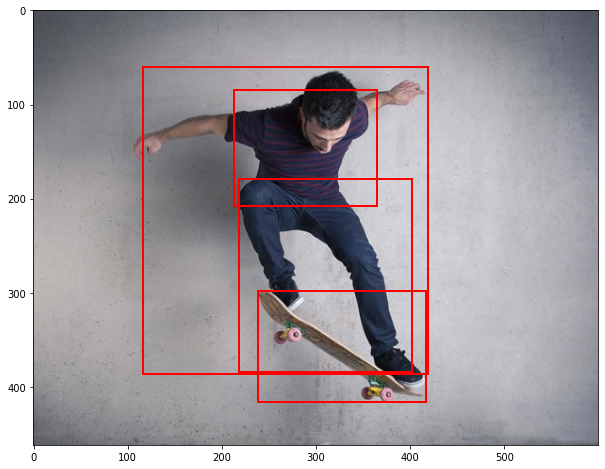

In [ ]:
from Utils.Plotting import plot_image_with_boxes

plot_image_with_boxes(image_url, [ obj.rectangle for obj in detect_objects_results.objects ])

### Detectar marcas

La detección de la marca es un modo especializado de detección de objetos que usa una base de datos de miles de logotipos mundiales para identificar las marcas comerciales en imágenes o vídeos. Puede usar esta característica, por ejemplo, para detectar qué marcas son más populares en medios sociales o más frecuentes en la ubicación de los productos multimedia. La base de datos de logotipos integrada cubre marcas populares de electrónica de consumo, vestimenta y mucho más. 

In [ ]:
image_url = "https://raw.githubusercontent.com/santiagxf/M72109/master/Vision/Images/coca.jfif"
detect_brands_results = computervision_client.analyze_image(image_url, visual_features=[VisualFeatureTypes.brands])

print("Marcas detectadas en la imágen: ")
if len(detect_brands_results.brands) == 0:
    print("No se detectaron marcas.")
else:
    for brand in detect_brands_results.brands:
        print("'{}' detectado con nivel de confidencia de {:.1f}% en {}, {}, {}, {}".format( \
        brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))

In [ ]:
plot_image_with_boxes(image_url, [ obj.rectangle for obj in detect_brands_results.brands ])

### Reconocimiento de texto en manuscrita

Computer Vision API incluye funcionalidades para el reconocimiento óptico de caracteres (OCR) que permiten extraer texto impreso o manuscrito de imágenes. Puede extraer texto de imágenes, como fotos de matrículas o de contenedores con números de serie, así como de documentos; por ejemplo, facturas, recibos, informes financieros y artículos, entre otros.

Para más información sobre este servicio pueden revisar: https://docs.microsoft.com/es-es/azure/cognitive-services/computer-vision/concept-recognizing-text

In [ ]:
from Utils.Cognitive import get_response_from_async

image_handw_text_url = "https://raw.githubusercontent.com/santiagxf/M72109/master/Vision/Images/caligrafica.jpg"
recognize_handw_results = computervision_client.read(image_handw_text_url, raw=True, language='es')
get_handw_text_results = get_response_from_async(computervision_client, recognize_handw_results)

# Print the detected text, line by line
if get_handw_text_results.status == OperationStatusCodes.succeeded:
    for text_result in get_handw_text_results.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)

3 hijes hermesos que la
[5.0, 24.0, 416.0, 11.0, 417.0, 40.0, 5.0, 51.0]
a perdiolo de mi primer
[0.0, 91.0, 430.0, 78.0, 431.0, 108.0, 0.0, 126.0]
, el correr de los años to
[0.0, 156.0, 439.0, 128.0, 440.0, 161.0, 1.0, 187.0]
gor, paquin y Martina car
[2.0, 205.0, 438.0, 190.0, 440.0, 223.0, 3.0, 239.0]
complelo sammas pense
[0.0, 267.0, 425.0, 255.0, 426.0, 279.0, 0.0, 297.0]


### OCR

In [ ]:
printed_text_image_url = "https://raw.githubusercontent.com/santiagxf/M72109/master/Vision/Images/printed_text.jpg"

ocr_result_remote = computervision_client.recognize_printed_text(printed_text_image_url, language='unk')
for region in ocr_result_remote.regions:
    for line in region.lines:
        print("Region: {}".format(line.bounding_box))
        s = ""
        for word in line.words:
            s += word.text + " "
        print(s)

Region: 79,94,1109,81
Nutrition Facts Amount Per Serving 
Region: 220,171,334,51
see: bar (40g) 
Region: 654,205,321,50
Total Fat 13g 
Region: 45,230,473,56
Servng Per Package: 4 
Region: 682,287,433,50
Saturated t 1.5 g 
Region: 11,347,474,50
Amount Per Serving 
Region: 19,436,256,43
alories 190 
Region: 32,517,397,43
ories from Fat 110 
Region: 72,618,394,41
t Daily Values are based 
Region: 673,362,289,53
Trans Fat Og 
Region: 613,438,422,60
Cholesterol Omg 
Region: 598,517,358,53
Sodium 20mq 
